In [207]:
import random
import statistics
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from collections import Counter

## Setting up data and variables

In [5]:
irisData = datasets.load_iris()

In [6]:
xVals = irisData['data'][:,2:]
yVals = irisData['target']
distanceArray = []

### Plot of unclassified data

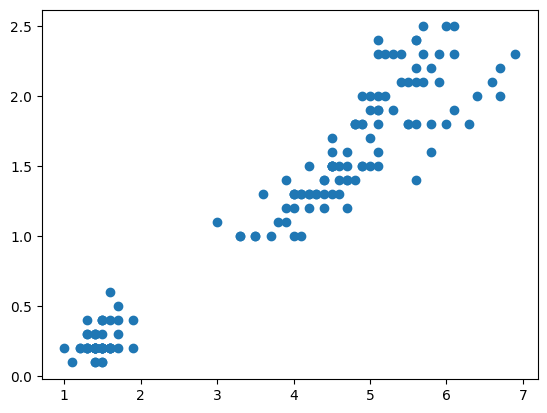

In [18]:
plt.scatter(xVals[:,0],xVals[:,1],marker='o')

In [224]:
flowerType = {
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
}

## Functions

In [8]:
def getDistance(arr1,arr2):
    return (sum((x-y)**2 for x,y in zip(arr1,arr2))**0.5)

In [190]:
def createClusters(k):
    cluster = dict()
    for i in range(k):
        cluster[tuple(random.choice(xVals))] = []
    return cluster

In [234]:
def kmeans(k,points,labels,override):
    iter = 0
    # Randomly assign centroids on first itteration
    if iter == 0 and not override:
        clusters = createClusters(k)

    if override:
        clusters = {
            (2,0.5): [],
            (4,1): [],
            (7,2.5): []
        }
    prevClusters = {}

    while clusters != prevClusters and iter < 300:
        # Clear old cluster values
        clusters = {key: [] for key in clusters}
        # Assign points to centroids
        for point,label in zip(points,labels):
            distance = -1 
            assignedCluster = (-1,-1)
            for centroid in clusters:
                # Find distance to centroid
                tempDistance = getDistance(point,list(centroid))
                # Initialize distance and assigned cluster
                if distance == -1:
                    distance = tempDistance
                    assignedCluster = centroid
                elif tempDistance < distance:
                    distance = tempDistance
                    assignedCluster = centroid
            # Add point to cluster along with label
            clusters[assignedCluster].append(list(np.append(point,label)))
        
        # Adjust centroids 
        tempCluster = {}
        for centroid in clusters:
            # Calculate new centroid key
            newCentroid = tuple(
                [statistics.mean(x) for x in zip(*clusters[centroid][:-1])]
            )
            # Add key to temp cluster
            tempCluster[tuple(newCentroid)] = clusters[centroid]
        iter += 1
        prevClusters = clusters
        clusters = tempCluster
    print('Total iterations: ',iter + 1)
    return clusters
    

In [235]:
def getAccuracy(k,clusters):
    accuracyArr = []
    for key,val in clusters.items():
        # Get list of correct class values of cluster
        val = np.array(val)
        count = Counter(val[:,-1])
        # Determine accuracy 
        accuracy = count[max(count,key=count.get)] / len(val)
        accuracyArr.append(accuracy)
        
    avgAccuracy = round((statistics.mean(accuracyArr))*100,2)
    print('Average accuracy accross clusters when k =',k,': ',avgAccuracy,'%')

## Testing

### K = 3

In [236]:
clusters = kmeans(3,xVals,yVals,True)

Total iterations:  9


In [237]:
getAccuracy(3,clusters=clusters)

Average accuracy accross clusters when k = 3 :  94.85 %


### Plot of classified data

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


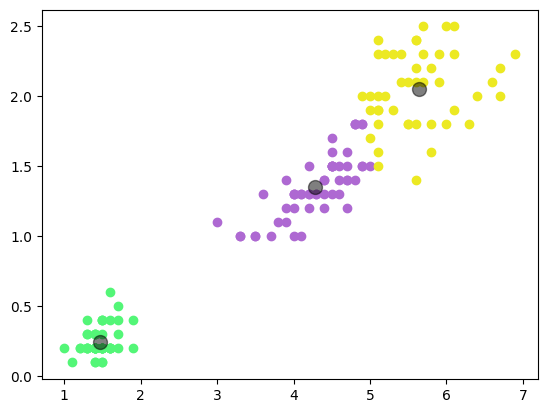

In [238]:
centers = np.array([*list(clusters.keys())])
for key,val in clusters.items():
    val = np.array(val)
    plt.scatter(val[:, 0], val[:, 1], c=np.random.rand(3,),marker='o')

plt.scatter(centers[:, 0], centers[:, 1], c='black',s=100, alpha=0.5)
plt.show()

It took 8 itterations to converge. The average accuray of the clusters when K = 3 is 94.

### 1 <= K <= 10

In [241]:
for k in range(1,11):
   tempClusters = kmeans(k,xVals,yVals,False)
   getAccuracy(k,clusters=tempClusters)

Total iterations:  3
Average accuracy accross clusters when k = 1 :  33.33 %
Total iterations:  5
Average accuracy accross clusters when k = 2 :  74.27 %
Total iterations:  6
Average accuracy accross clusters when k = 3 :  96.05 %
Total iterations:  5
Average accuracy accross clusters when k = 4 :  85.13 %
Total iterations:  11
Average accuracy accross clusters when k = 5 :  90.27 %
Total iterations:  5
Average accuracy accross clusters when k = 6 :  82.27 %
Total iterations:  14
Average accuracy accross clusters when k = 7 :  96.95 %
Total iterations:  13
Average accuracy accross clusters when k = 8 :  95.39 %
Total iterations:  8
Average accuracy accross clusters when k = 9 :  97.17 %
Total iterations:  7
Average accuracy accross clusters when k = 10 :  94.81 %
